## Telecom Churn


Aquí se va a entender:
  
  como está compuesto el dataset 
  
  las preguntas de negocio 
  
  relevancia de la variables 
  
  y todo la preparación antes del modelo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/raw/dataset.csv')

In [8]:
df['Unlimited Data']

0       Yes
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: Unlimited Data, Length: 7043, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


([<matplotlib.patches.Wedge at 0x206445c1670>,
 [Text(-0.9465190185455125, -0.5604478098196476, 'Stayed'),
  Text(1.0398991324844973, 0.3586220772038304, 'Churned'),
  Text(0.2212420708774077, 1.0775212044660079, 'Joined')],
 [Text(-0.5162831010248249, -0.3056988053561714, '67.02%'),
  Text(0.5672177086279075, 0.1956120421111802, '26.54%'),
  Text(0.12067749320585873, 0.5877388387996406, '6.45%')])

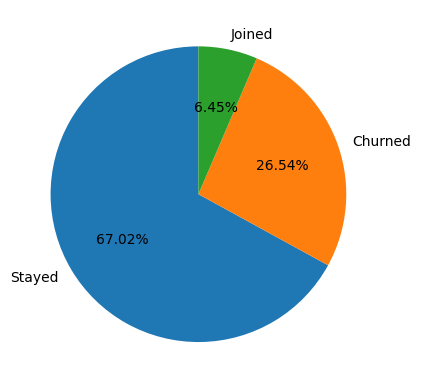

In [7]:
conteo = df['Customer Status'].value_counts()

plt.pie(conteo,labels=conteo.index,autopct='%1.2f%%',
        startangle=90)

-----------------

#### 1. Demographic Features

In [8]:
cols_demogra =['Gender', 'Age', 'Married', 'Number of Dependents','City']

In [9]:
df[cols_demogra + ['Customer Status']].describe()

,Age,Number of Dependents
count,7043.000000,7043.000000
mean,46.509726,0.468692
std,16.750352,0.962802
min,19.000000,0.000000
25%,32.000000,0.000000
50%,46.000000,0.000000
75%,60.000000,0.000000
max,80.000000,9.000000


<Axes: xlabel='Customer Status', ylabel='Age'>

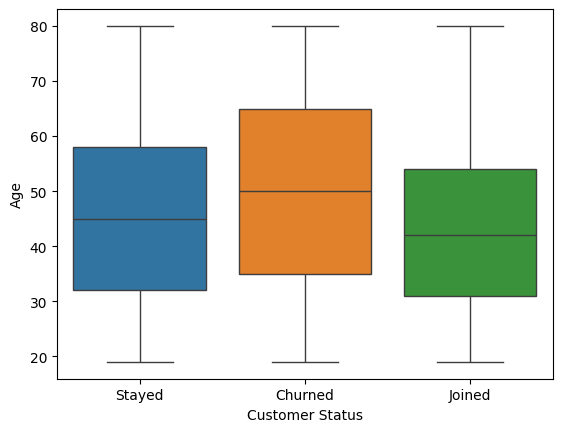

In [10]:
sns.boxplot(data=df, x='Customer Status', y='Age',hue='Customer Status')


Observando el gráfico anterior observamos que con lo que se refiere a tasa de abandono, sus edades oscilan entre 35-64 años

------------------

#### 2. Customer Relationship & Tenure

- Tenure: 

In [11]:
df['Tenure in Months'].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64

In [12]:
df['Tenure in Months'].skew()  # Se mide la simetría

np.float64(0.24054261407486305)

<Axes: >

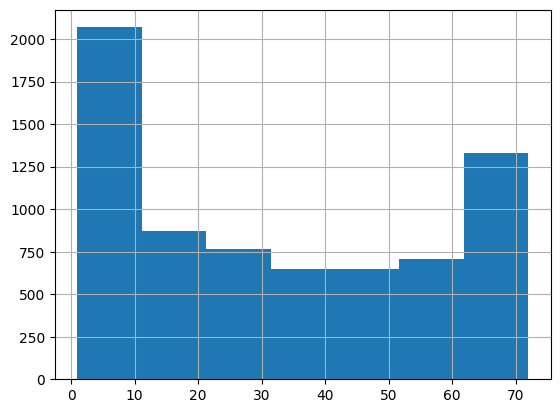

In [13]:
df['Tenure in Months'].hist(bins=7)


La distribución de la tenencia muestra una baja asimetría (0,21), lo que indica una simetría aproximada. Sin embargo, 
el histograma revela densidades más altas en los extremos, lo que sugiere una distribución no normal 
posiblemente impulsada por distintos segmentos de clientes. Por lo tanto, 
se prefirieron las pruebas no paramétricas para las comparaciones de grupos.

## Hipótesis:

H₀: La distribución de tenure es la misma para churned y non-churned

H₁: Las distribuciones difieren

In [14]:
from scipy.stats import mannwhitneyu

churn = df.loc[df['Customer Status']== 'Churned','Tenure in Months']
no_churn = df.loc[df['Customer Status']== 'Stayed','Tenure in Months']

In [15]:
u_stat,p_value = mannwhitneyu(churn,no_churn,alternative='two-sided')

print(f"Statistic: {u_stat}")
print(f"p-valor: {p_value}")

Statistic: 1809954.0
p-valor: 9.013952273021874e-306


In [16]:
df.groupby('Customer Status')['Tenure in Months'].median()


Customer Status
Churned    10.0
Joined      1.0
Stayed     42.0
Name: Tenure in Months, dtype: float64

La prueba U de Mann–Whitney muestra un valor p extremadamente pequeño (p < 0,001), lo que proporciona evidencia sólida de que la distribución de la tenencia difiere entre clientes abandonados y no abandonados. Los clientes que abandonan el servicio presentan períodos de servicio significativamente más cortos, lo que sugiere que el riesgo de abandono es mayor durante las primeras etapas del ciclo de vida del cliente.

 - Number of Referrals: 

In [17]:
df['Number of Referrals'].describe()

count    7043.000000
mean        1.951867
std         3.001199
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        11.000000
Name: Number of Referrals, dtype: float64

In [18]:
df['Number of Referrals'].skew()

np.float64(1.4460596247412694)

<Axes: >

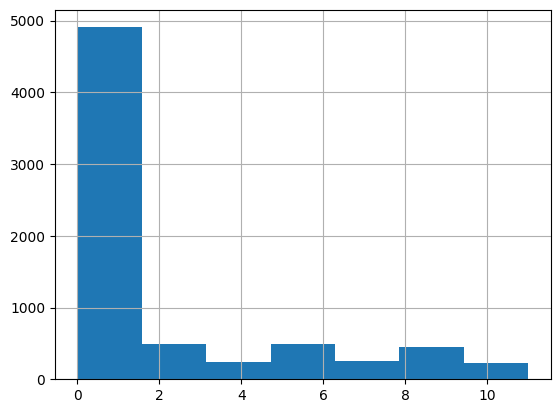

In [19]:
df['Number of Referrals'].hist(bins=7)

In [20]:
churn2 = df.loc[df['Customer Status']== 'Churned','Number of Referrals']
no_churn2 = df.loc[df['Customer Status']== 'Stayed','Number of Referrals']

In [21]:
u_stat,p_value = mannwhitneyu(churn2,no_churn2,alternative='two-sided')

print(f"Statistic: {u_stat}")
print(f"p-valor: {p_value}")

Statistic: 3017018.5
p-valor: 2.3001499835812344e-104


In [22]:
df.groupby('Customer Status')['Number of Referrals'].median()

Customer Status
Churned    0.0
Joined     0.0
Stayed     1.0
Name: Number of Referrals, dtype: float64

El número de referencias muestra una relación similar con la rotación como permanencia, probablemente porque las referencias se acumulan con el tiempo. Esto sugiere que las referencias capturan parcialmente la longevidad y la satisfacción del cliente en lugar de actuar como un impulsor independiente de la pérdida de clientes.

----------------

#### 3. Contract & Billing

- Contract: 

In [23]:
df['Contract'].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [24]:
from scipy.stats import chi2_contingency

### Hipótesis con un nivel de 0,05: 
H₀ : No existe relación directa entre el tipo de contrato y el Churn

H₁ : Si existe relación directa del tipo de contrato con el Churn

In [25]:
contigency = pd.crosstab(df['Contract'],df['Customer Status'])

chi2,p_value,dof,expected = chi2_contingency(contigency)

print(f"Chi2: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")

Chi2: 1987.3646789662553
p-value: 0.0
Degrees of freedom: 4


Como p-valor < 0,05, podemos afirmar que estadísticamente no son variables independiente, 

pero para asegurarnos de la causalidad, debemos realizar al menos una prueba visual  que lo confirme.

In [26]:
# Porcentage de abandono por contrato

pd.crosstab(
    df['Contract'],
    df['Customer Status'],
    normalize='index'
)

Customer Status,Churned,Joined,Stayed
Contract,,,
Month-to-Month,0.458449,0.113019,0.428532
One Year,0.107097,0.015484,0.877419
Two Year,0.025491,0.011683,0.962825


- Monthly charge: 

In [27]:
df.groupby('Customer Status')['Monthly Charge'].mean()

Customer Status
Churned    73.347592
Joined     42.775991
Stayed     61.737415
Name: Monthly Charge, dtype: float64

In [28]:
df.groupby('Customer Status')['Monthly Charge'].median()

Customer Status
Churned    79.500
Joined     43.975
Stayed     65.600
Name: Monthly Charge, dtype: float64

<Axes: xlabel='Customer Status', ylabel='Monthly Charge'>

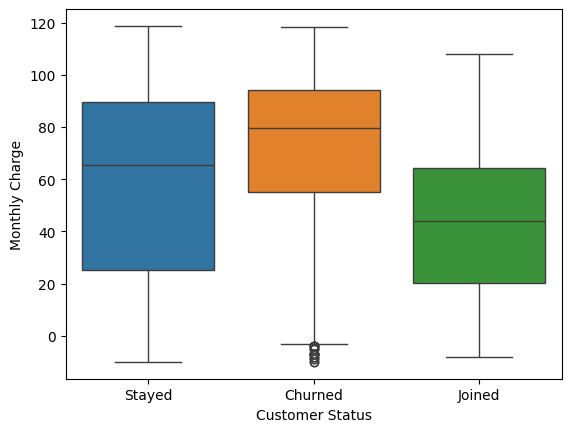

In [29]:
sns.boxplot(df, x='Customer Status', y='Monthly Charge', hue='Customer Status')

Fijandonso en el gráfico superiro podemos observar que el ragngo de los clientes que abandonan se encuentran los 57 y 92 $/month

### Hipótesis: 

H₀ : No existe relación directa entre el cargo mensual y el Churn

H₁ : Si existe relación directa entre el cargo mensual con el Churn

In [30]:
u_stat4,p_value4 = mannwhitneyu(churn2,no_churn2,alternative='two-sided')

print(f"Statistic: {u_stat4}")
print(f"p-valor: {p_value4:5e}")


Statistic: 3017018.5
p-valor: 2.300150e-104


#### Clonclusión: 
Se rechaza H0 ya que el p-valor es muy inferior al 0.05 estipulado como premisa

----------

Payment Method: 

In [31]:
df['Payment Method'].value_counts()

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

In [32]:
contingency2 = pd.crosstab(
    df['Payment Method'],
    df['Customer Status']
)

contingency2

Customer Status,Churned,Joined,Stayed
Payment Method,,,
Bank Withdrawal,1329,181,2399
Credit Card,398,231,2120
Mailed Check,142,42,201


In [33]:
churn_rate = pd.crosstab(
    df['Payment Method'],
    df['Customer Status'],
    normalize='index'
)

churn_rate


Customer Status,Churned,Joined,Stayed
Payment Method,,,
Bank Withdrawal,0.339985,0.046303,0.613712
Credit Card,0.144780,0.084031,0.771190
Mailed Check,0.368831,0.109091,0.522078


In [34]:
chi2,p_value,dof,expected = chi2_contingency(contingency2)

print(f"Chi 2: {chi2}")
print( )
print(f"p_value: {p_value}")

Chi 2: 369.4541767779527

p_value: 1.1038755268241735e-78


#### Conclusiones: 
Como se ha observado anteriormente con las 3 variables escogidas para este bloque, ambas demuestran tener una furte relación con el acontecimiento de Churn,

demostrandose estadísticamente a través de los contrastes de hipótesis y los resultados obtenidos.

----------

#### 4. Services and Internet

In [35]:
df['Internet Service'].value_counts()

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64

In [36]:
contingency3 = pd.crosstab( 
    df['Internet Service'],
    df['Customer Status'],
    normalize='index'
)

contingency3

Customer Status,Churned,Joined,Stayed
Internet Service,,,
No,0.074050,0.119266,0.806684
Yes,0.318289,0.049302,0.632409


In [37]:
df.groupby('Internet Type')['Monthly Charge'].sum().sort_values(ascending=False)

Internet Type
Fiber Optic    273364.55
DSL             93821.20
Cable           49264.95
Name: Monthly Charge, dtype: float64

In [38]:
df['churn_binary'] = df['Customer Status'].isin(['Churned']).astype(int)


In [39]:
contingency4 = pd.crosstab( 
    df['Internet Type'],
    df['churn_binary']
    
)

contingency4

churn_binary,0,1
Internet Type,,
Cable,617,213
DSL,1345,307
Fiber Optic,1799,1236


- Se observa que según el tipo de internet que se tiene, experimenta más abandono en Fibra Óptica, 

  mientras que el internet suministrado por DSL tiene mayor porcentage de retención.

In [40]:
chi2,p_value,dof,expected = chi2_contingency(contingency4)

print(f"Chi 2: {chi2}")
print( )
print(f"p_value: {p_value}")

Chi 2: 258.81066438274036

p_value: 6.309258194179288e-57


<Axes: >

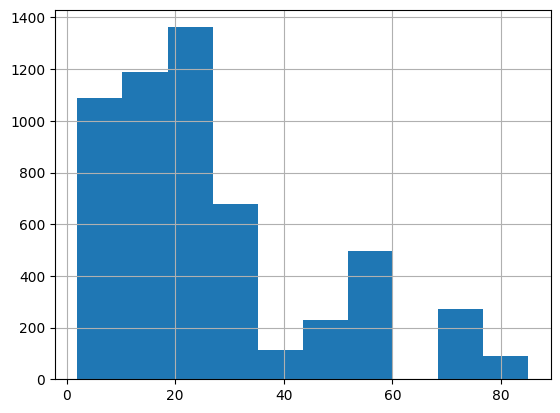

In [41]:
df['Avg Monthly GB Download'].hist(bins=10)

In [42]:
df['Avg Monthly GB Download'].describe()

count    5517.000000
mean       26.189958
std        19.586585
min         2.000000
25%        13.000000
50%        21.000000
75%        30.000000
max        85.000000
Name: Avg Monthly GB Download, dtype: float64

In [43]:
df['Avg Monthly GB Download'].skew()

np.float64(1.1840559777787092)

In [44]:
df['Avg Monthly GB Download'].isna().sum()

np.int64(1526)

In [45]:
# Se rellena los valores nulos con imputación condicinal (media por grupo y sino rellenar con la mediana global)

global_median = df['Avg Monthly GB Download'].median()

median_by_status = (
                df
                .groupby('Customer Status')['Avg Monthly GB Download']
                .median()
                    )

In [46]:
# Se crea una función para sustitiuir los valores faltantes

def impute_gb(row):

    if pd.notna(row['Avg Monthly GB Download']):
        return row['Avg Monthly GB Download']
    
    if pd.notna(row['Customer Status']):
        return median_by_status.get(row['Customer Status'],global_median)
    
    return global_median

In [47]:
df['Avg Monthly GB Download'] = df.apply(impute_gb, axis=1)


H₀: La distribución de Avg Monthly GB Download es la misma para churn y no churn

H₁: Las distribuciones son diferentes

In [48]:
from scipy.stats import mannwhitneyu

churned = df[df['churn_binary'] == 1]['Avg Monthly GB Download']
not_churned = df[df['churn_binary'] == 0]['Avg Monthly GB Download']

stat, p_value = mannwhitneyu(churned, not_churned, alternative='two-sided')

print(f"Statistic: {stat}")
print(f"p-value: {p_value:.4e}")


Statistic: 4261891.0
p-value: 2.1683e-14


- Despues de observar el histograma y comprobar el resultado arrojado por el test de Mnann- Whitney, 

  podemos afirmar que existe independencia estadística y rechazar H0


-------------

## Bloque ML

## **Premisas para el desarrollo de los modelos de Machine Learning:**

- El dataset se restringirá a aquellas features que hayan demostrado mayor relevancia estadística y que estén disponibles antes de conocer el churn, evitando así cualquier tipo de data leakage.

- Como métrica principal de evaluación se priorizará el **Recall** y **ROC-AUC**, ya que, desde el área de negocio, el objetivo es identificar al mayor número posible de clientes con alta probabilidad de abandono de los servicios de la compañía.

- Dado que el problema consiste en predecir la probabilidad de abandono, se optará por el uso de modelos de clasificación.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [50]:
# Selección de variables

features = [
    'Tenure in Months',
    'Monthly Charge',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Unlimited Data',
    'Avg Monthly GB Download',
    'Number of Referrals'
]


In [51]:
X=df[features]
y= df['churn_binary']

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y, random_state=42) # Estratifico 'y' para mantener la proporcionalidad en train y test

In [53]:
import os

In [54]:
BASE_DIR = os.path.abspath("..")
DATA_DIR = os.path.join(BASE_DIR, "data", "processed")    # Se establece la ruta de destino de carpeta

In [55]:
X_train.to_csv(os.path.join(DATA_DIR, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(DATA_DIR, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(DATA_DIR, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(DATA_DIR, "y_test.csv"), index=False)

In [56]:
# En este paso, divido las variables numéricas y categóricas para después aplicar las transformaciones de estandarización y encode 

num_features = ['Tenure in Months', 'Monthly Charge', 'Avg Monthly GB Download']
cat_features = ['Contract', 'Paperless Billing', 'Payment Method', 'Unlimited Data']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)


In [57]:
# Base Line Model

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


#### Para hacerlo de manera más estructurada y clara se usara un **Pipeline** con GridSearch.

Modelos a utilizar: 

- LogisticRegression
- RandomForest Classifier
- SVG
- XGBoost

In [58]:
# Aquí se definen los parámetros de los modelos a usar

logistic_params = {
    'classifier': [
        LogisticRegression(max_iter=1000, solver='liblinear'),
    ],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1, 10]  # regularización
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, None],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

svm_params = {
    'classifier': [svm.SVC(probability=True)],  # probability=True para poder usar predict_proba
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

xgboost_params = {
   
    'classifier': [XGBClassifier(use_label_encoder=False, eval_metric='logloss')],
   'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}



# lista de diccionarios
search_space = [logistic_params, random_forest_params, svm_params, xgboost_params]


In [59]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    estimator=pipe,
    param_grid=search_space,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='roc_auc'  
)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\Angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Tenure '
                                                                          'in '
                                                                          'Months',
                                                                          'Monthly '
                                                                          'Charge',
                                                                          'Avg '
                                                                          'Monthly '
                                                                          'GB '
                                                                          'Download']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Contract',
                                                                          'Paperless '
                                                                          'Billing',
                                                                          'Payment '
                                                                          'Method',
                                                                          'Unlimited '
                                                                          'Data'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_j...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None, ...)],
                          'classifier__colsample_bytree': [0.8, 1],
                          'classifier__learning_rate': [0.01, 0.05, 0.1],
                          'classifier__max_depth': [3, 5],
                          'classifier__n_estimators': [100, 300],
                          'classifier__subsample': [0.8, 1]}],
             scoring='roc_auc', verbose=2)

In [60]:
best_model = clf.best_estimator_  # Mejor modelo por sus métricas 

In [61]:
# Se crean los directorios

BASE_DIR = os.path.abspath("..")

MODEL_DIR = os.path.join(BASE_DIR, "models")
TRAINED_DIR = os.path.join(MODEL_DIR,"trained_models")
FINAL_MODEL = os.path.join(MODEL_DIR, "final_model")

os.makedirs(TRAINED_DIR, exist_ok=True)
os.makedirs(FINAL_MODEL, exist_ok=True)

In [62]:
import joblib

joblib.dump(
    clf,
    os.path.join(TRAINED_DIR, "all_trained_models.pkl")   # se meten todos los modelos entrenados (por el GridSeach)
)

['c:\\Users\\Angel\\Desktop\\PROYECTOS\\Telecom_churn\\models\\trained_models\\all_trained_models.pkl']

In [69]:
joblib.dump(
    best_model,
    os.path.join(FINAL_MODEL,"best_model.pkl")
    )

['c:\\Users\\Angel\\Desktop\\PROYECTOS\\Telecom_churn\\models\\final_model\\best_model.pkl']

In [64]:
print(clf.best_estimator_['classifier'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [65]:

best_model = clf.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1035
           1       0.70      0.62      0.66       374

    accuracy                           0.83      1409
   macro avg       0.78      0.76      0.77      1409
weighted avg       0.82      0.83      0.82      1409

ROC-AUC: 0.8891278514040662


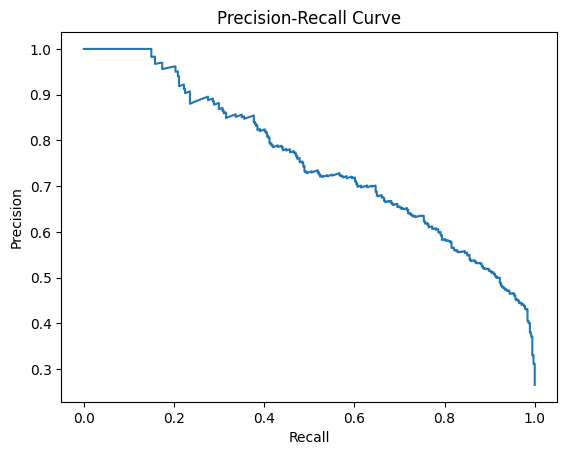

In [66]:
# Se pinta la gráfica de la curva de ROC-AUC

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [67]:
def recall_vs_prec(y_true, y_proba,numero):
    precision,recall,_ = precision_recall_curve(y_true,y_proba)

    valid_recalls = recall[precision>numero]

    if len(valid_recalls)==0:
        return None
    
    return valid_recalls.max()

In [70]:
numero = float(input("Que nivel de precisión quiers tener ? : "))

resultado = recall_vs_prec(y_test, y_proba,numero)
print(f"Con el nivel de precisión de {round(numero,4) * 100} %, el porcentaje de churn capturado es de {round(resultado,4) * 100} %")

Con el nivel de precisión de 78.0 %, el porcentaje de churn capturado es de 45.72 %


In [ ]:
import pandas as pd

final_threshold = 0.35


results = pd.DataFrame({
    'churn_prob': y_proba,
    'real_churn': y_test
})

results['predicted_churn'] = (results['churn_prob'] >= final_threshold).astype(int)

results['predicted_churn'].value_counts()


predicted_churn
0    957
1    452
Name: count, dtype: int64

#### **SHAP**

In [ ]:
model = best_model.named_steps['classifier']


In [ ]:
X_train_trans = best_model.named_steps['preprocessor'].transform(X_train)
X_test_trans = best_model.named_steps['preprocessor'].transform(X_test)


In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_trans)


In [ ]:
ohe = best_model.named_steps['preprocessor'] \
                .named_transformers_['cat']

cat_feature_names = ohe.get_feature_names_out(cat_features)

feature_names = list(cat_feature_names) + num_features


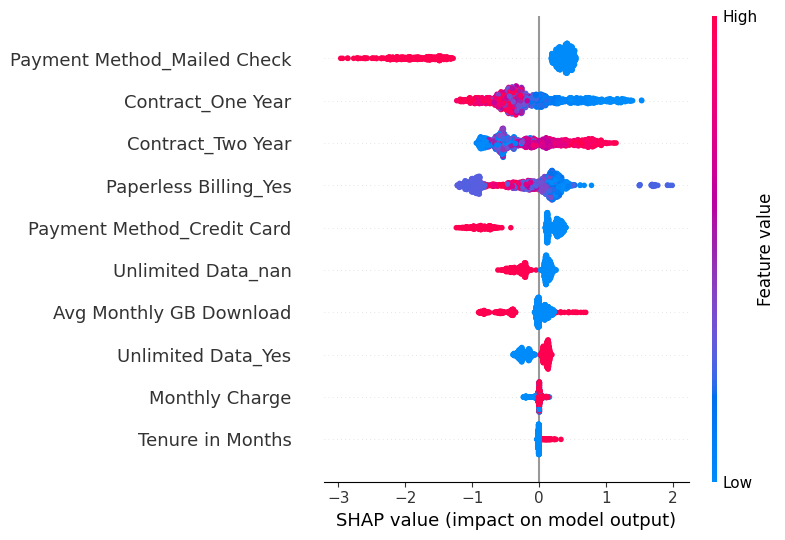

In [ ]:
shap.summary_plot(shap_values, X_test_trans, feature_names=feature_names)
